# Gantt chart

In [1]:
from datetime import datetime
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import matplotlib.dates as mdates
import logging
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

graphtitle = "Anscombe's Quartet"
graphylabel = 'Y'
graphxlabel = 'X'

In [2]:
class Gantt():

# Create twice as many entries as you have tasks
    RdYlGr = ['#00FF00', '#FF0000', '#0000FF',
              '#00FF00', '#FF0000', '#0000FF',
              '#00FF00', '#FF0000', '#0000FF',
              '#00FF00', '#FF0000', '#0000FF',
              '#00FF00', '#FF0000', '#0000FF',
              '#00FF00', '#FF0000', '#0000FF']

    POS_START = 1.0
    POS_STEP = 0.5

    def __init__(self, tasks):
        self._fig = plt.figure()
#        self._ax = self._fig.add_axes([0.1, 0.1, .75, .5])
        self._ax = self._fig.add_axes([0.1, 0.1, .75, .5])
        self.tasks = tasks[::-1]

    def _format_date(self, date_string):
        '''
        Formats string representation of *date_string* into *matplotlib.dates*
        instance.
        '''
        try:
#            date = datetime.strptime(date_string, '%Y-%m-%d %H:%M:%S')
            date = datetime.strptime(date_string, '%Y-%m-%d')
        except ValueError as err:
            logging.error("String '{0}' can not be converted to datetime object: {1}"
                  .format(date_string, err))
            sys.exit(-1)
        mpl_date = mdates.date2num(date)
        return mpl_date

    def _plot_bars(self):
        '''
        Processes each task and adds *barh* to the current *self._ax* (*axes*).
        '''
        i = 0
        for task in self.tasks:
            start = self._format_date(task['start'])
            end = self._format_date(task['end'])
            bottom = (i * Gantt.POS_STEP) + Gantt.POS_START
            width = end - start
            self._ax.barh(bottom, width, left=start, height=0.2,
                          align='center', label=task['label'],
                          color = Gantt.RdYlGr[i], edgecolor = "none")
            i += 1

    def _configure_yaxis(self):
        '''y axis'''
        task_labels = [t['label'] for t in self.tasks]
        pos = self._positions(len(task_labels))
        ylocs = self._ax.set_yticks(pos)
        ylabels = self._ax.set_yticklabels(task_labels)
        plt.setp(ylabels, size='medium')

    def _configure_xaxis(self):
        ''''x axis'''
        # make x axis date axis
        self._ax.xaxis_date()

        # format date to ticks on every 7 days
        rule = mdates.rrulewrapper(mdates.DAILY, interval=7)
        loc = mdates.RRuleLocator(rule)
        formatter = mdates.DateFormatter("%d %b")

        self._ax.xaxis.set_major_locator(loc)
        self._ax.xaxis.set_major_formatter(formatter)
        xlabels = self._ax.get_xticklabels()
        plt.setp(xlabels, rotation=30, fontsize=9)

    def _configure_figure(self):
        self._configure_xaxis()
        self._configure_yaxis()

        self._ax.grid(True, color='gray')
#        self._set_legend()
        self._fig.autofmt_xdate()

    def _set_legend(self):
        '''
        Tweak font to be small and place *legend*
        in the upper right corner of the figure
        '''
        font = font_manager.FontProperties(size='small')
        self._ax.legend(loc='upper right', prop=font)

    def _positions(self, count):
        '''
        For given *count* number of positions, get array for the positions.
        '''
        end = count * Gantt.POS_STEP + Gantt.POS_START
        pos = np.arange(Gantt.POS_START, end, Gantt.POS_STEP)
        return pos

    def show(self):
        self._plot_bars()
        self._configure_figure()
#        plt.savefig('gantt_chart.svg', format='svg')
        plt.show()

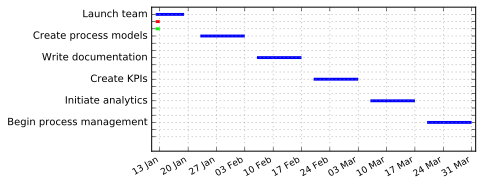

In [3]:
# @IgnorePep8
if __name__ == '__main__':
    data = (
        { 'label': 'Launch team', 'start':'2017-01-12', 'end': '2017-01-19'},
        { 'label': '', 'start':'2017-01-12', 'end': '2017-01-13'},
        { 'label': '', 'start':'2017-01-12', 'end': '2017-01-13'},
        { 'label': 'Create process models', 'start':'2017-01-23', 'end': '2017-02-03'},
        { 'label': '', 'start':'2017-01-23', 'end': '2017-01-23'},
        { 'label': '', 'start':'2017-01-23', 'end': '2017-01-23'},
        { 'label': 'Write documentation', 'start':'2017-02-06', 'end': '2017-02-17'},
        { 'label': '', 'start':'2017-02-06', 'end': '2017-02-06'},
        { 'label': '', 'start':'2017-02-06', 'end': '2017-02-06'},
        { 'label': 'Create KPIs', 'start':'2017-02-20', 'end': '2017-03-03'},
        { 'label': '', 'start':'2017-02-20', 'end': '2017-02-20'},
        { 'label': '', 'start':'2017-02-20', 'end': '2017-02-20'},
        { 'label': 'Initiate analytics', 'start':'2017-03-06', 'end': '2017-03-17'},
        { 'label': '', 'start':'2017-03-06', 'end': '2017-03-06'},
        { 'label': '', 'start':'2017-03-06', 'end': '2017-03-06'},
        { 'label': 'Begin process management', 'start':'2017-03-20', 'end': '2017-03-31'},
        { 'label': '', 'start':'2017-03-20', 'end': '2017-03-20'},
        { 'label': '', 'start':'2017-03-20', 'end': '2017-03-20'},
                )

gantt = Gantt(data)
gantt.show()